#### Import Libraries

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df=pd.read_csv("car data.csv")

In [4]:
# Display the first few rows of the dataset
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Display summary statistics of the dataset
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
# check the shape of the dataset
df.shape

(301, 9)

In [11]:
# check for missing values 
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [14]:
# checking the distribution of the categorical columns
print(df.value_counts("Fuel_Type"))
print(df.value_counts("Seller_Type"))
print(df.value_counts("Transmission"))

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


#### Encoding categorical columns

In [17]:
# Fuel Type
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
# Seller Type
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
# Transmission
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_2132\1354905428.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)


In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
x=df.drop(columns=["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]

In [21]:
print(x)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [22]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


#### Spliting dataset into train and test 

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print("the shape of x is :",x.shape,"the shape of x_train is :",x_train.shape,"the shape of x_test is :",x_test.shape)

the shape of x is : (301, 7) the shape of x_train is : (240, 7) the shape of x_test is : (61, 7)


#### Model training 

In [25]:
model=LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

#### Model evalution

In [28]:
x_train_prediction=model.predict(x_train)

In [30]:
accuracy_train=r2_score(y_train,x_train_prediction)
print("the accuracy of the training data is :",accuracy_train)
accuracy_train_mse=mean_squared_error(y_train,x_train_prediction)
print("the mean squared error of the training data is :",accuracy_train_mse)

the accuracy of the training data is : 0.8839793496750801
the mean squared error of the training data is : 3.067244526278776


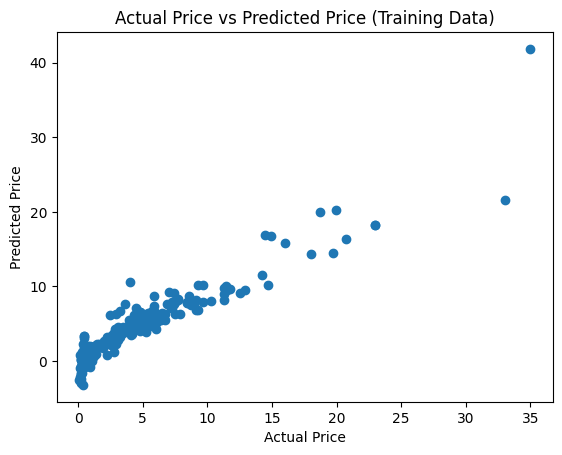

In [34]:
# visualizing the training data
plt.scatter(y_train,x_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Training Data)")
plt.show()

In [35]:
x_test_prediction=model.predict(x_test)
accuracy_test=r2_score(y_test,x_test_prediction)
print("the accuracy of the testing data is :",accuracy_test)
accuracy_test_mse=mean_squared_error(y_test,x_test_prediction)
print("the mean squared error of the testing data is :",accuracy_test_mse)

the accuracy of the testing data is : 0.8468053957654199
the mean squared error of the testing data is : 3.5289272538980834


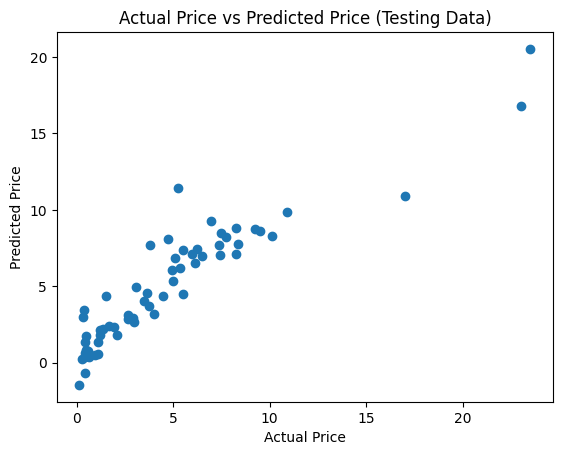

In [36]:
# visualizing the training data
plt.scatter(y_test,x_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Testing Data)")
plt.show()

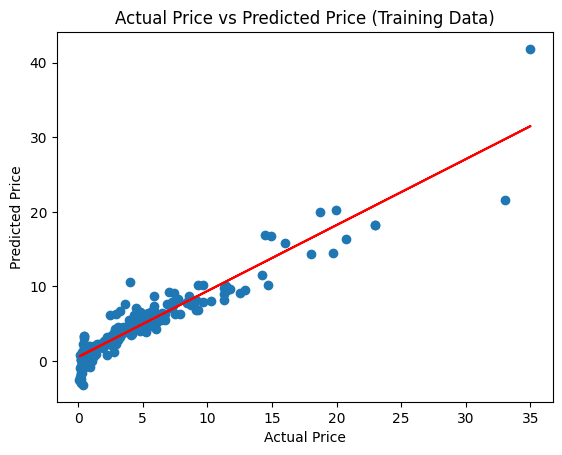

In [39]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_train, x_train_prediction)
plt.plot(y_train, np.poly1d(np.polyfit(y_train, x_train_prediction, 1))ي, color='red')  # خط البيست فيت
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price (Training Data)")
plt.show()


#### Making predictive system

In [46]:
input_data=(2014,5.59,27000,0,1,1,0)

input_data_asarray=np.asarray(input_data)

input_data_reshape=input_data_asarray.reshape(1,-1)

prediction=model.predict(input_data_reshape)
print("the predicted price of the car is :",prediction[0])

the predicted price of the car is : 4.431568592227791


c:\Users\mahmo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### Saving Model 

In [ ]:
import pickle

In [48]:
file_name="car_price_prediction_model"
pickle.dump(model,open(file_name,"wb"))